## Analyze A/B Test Results

This project is to assure the mastery  of the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important to get some practice working with the difficulties of these topics.

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  Our goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.



<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

##### `1.` Now, read in the `ab_data.csv` data. Store it in `ab_file`. 

`a`. Read in the dataset and take a look at the top few rows here:

In [2]:
ab_file=pd.read_csv('ab_data.csv')
ab_file.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


`b`. Use the below cell to find the number of rows in the dataset.

In [3]:
rows_no=ab_file.shape[0]
print('No. of rows in dataset are : ', rows_no)

No. of rows in dataset are :  294478


`c`. The number of unique users in the dataset.

In [4]:
ab_file.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

`d`. The proportion of users converted.

In [5]:
# Finding proportion of users converted by taking mean
print("Proportion of converted users is {}%".format((ab_file['converted'].mean())*100))

Proportion of converted users is 11.96591935560551%


`e`. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# rows where treatment group user lands incorrectly on old_page 
mismatch_grp1 = ab_file.query("group == 'treatment' and landing_page == 'old_page'")
print("Times treatment group user lands incorrectly on old_page is {}".format(len(mismatch_grp1)))

# rows where control group user incorrectly lands on new_page
mismatch_grp2 = ab_file.query("group == 'control' and landing_page == 'new_page'")
print("Times control group user incorrectly lands on new_page is {}".format(len(mismatch_grp2)))

#  number of times the new_page and treatment don't line up is sum of above two values
print("Times new_page and treatment don't line up is {}".format(len(mismatch_grp1) + len(mismatch_grp2)))

Times treatment group user lands incorrectly on old_page is 1965
Times control group user incorrectly lands on new_page is 1928
Times new_page and treatment don't line up is 3893


`f`. Do any of the rows have missing values?

In [7]:
# Check for missing values?
ab_file.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

###### `2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

`a`. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **ab_file2**.

In [8]:
# Deleting mismatching rows:
# drop rows for mismatched treatment groups
ab_file.drop(ab_file.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
# drop rows for mismatched control groups
ab_file.drop(ab_file.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [9]:
ab_file.info()    # Displaying information about the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
# save new clean dataset which contains no duplicates or records with missing or mismatched values
# we will use this dataset in next sections
ab_file.to_csv('ab_edited.csv', index=False)

In [11]:
# read newly created dataset into another dataframe
ab_file2 = pd.read_csv('ab_edited.csv')

In [12]:
# Double check whether all of the correct rows were removed ( this should be 0 )
ab_file2[((ab_file2['group'] == 'treatment') == (ab_file2['landing_page'] == 'new_page')) == False].shape[0]

0

##### `3.` Information about the updated dataframe:

In [13]:
# inspect df2
ab_file2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


`a`. How many unique **user_id**s are in **ab_file2**?

In [14]:
# Find unique users
print("Unique users:", len(ab_file2.user_id.unique()))

# Check for not unique users
print("Non-unique users:", len(ab_file2)-len(ab_file2.user_id.unique()))

Unique users: 290584
Non-unique users: 1


`b`. There is one **user_id** repeated in **ab_file2**.  What is it?

In [15]:
# Find duplicated user
ab_file2[ab_file2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`c`. What is the row information for the repeat **user_id**? 

In [16]:
# Find duplicates under user ids
ab_file2[ab_file2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`d`. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **ab_file2**.

In [17]:
ab_file2.drop(labels=2862, inplace=True)

# Check the drop worked
ab_file2[ab_file2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


##### `4.` Computing probabilities using updated frame:



`a`. What is the probability of an individual converting regardless of the page they receive?

In [18]:
# since values are 1 and 0, we can calculate mean to get probability of an individual converting 
print("Probability of user converting is :", ab_file2.converted.mean())

Probability of user converting is : 0.119597087245


`b`. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
# Probability of control group converting
print("Probability of control group converting:", 
      ab_file2[ab_file2['group']=='control']['converted'].mean())

Probability of control group converting: 0.1203863045


`c`. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
# Probability of treatment group converting
print("Probability of treatment group converting:", 
      ab_file2[ab_file2['group']=='treatment']['converted'].mean())

Probability of treatment group converting: 0.118808065515


`d`. What is the probability that an individual received the new page?

In [21]:
# Probability an individual recieved new page
print("Probability an individual recieved new page:", 
      ab_file2['landing_page'].value_counts()[0]/len(ab_file2))

Probability an individual recieved new page: 0.500061944223


`e`. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.


**Is there any evidence that one page leads to more conversions?**

 - Given that an individual was in the treatment group, the probability they converted is 0.118808065
 - Given that an individual was in the control group, the probability they converted is 0.1203863045
 - We find that old page does better, but by a very tiny margin of approximately 0.00158
 - Change aversion, test span durations and other potentially influencing factors are not taken into consideration. So, we cannot state with certainty that one page leads to more conversions. This is even more important due to almost similar performance of both pages.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we need to stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do we need to run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


#### `1.` For now, we need to make the decision just based on all the data provided.  If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should our null and alternative hypothesis be?  We can state our hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

#### Null-hypothesis
$H_0:  p_{new} - p_{old} \leq 0$

i.e. The null hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be equal to zero (the same) or lower than zero (the old page has a higher population conversion rate).

#### Alternative-hypothesis

$H_1: p_{new} - p_{old} \gt 0$

i.e. The alternative hypothesis is that the difference between the population conversion rate of users given the new page and the old page will be greater than zero (the new page has a higher population conversion rate).

#### `2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


`a`. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
p_new = ab_file2['converted'].mean()
print(p_new)

0.119597087245


`b`. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = ab_file2['converted'].mean()
print(p_old)

0.119597087245


`c`. What is $n_{new}$?

In [24]:
n_new = ab_file2[ab_file2['landing_page']=='new_page'].shape[0]
print(n_new)

145310


`d`. What is $n_{old}$?

In [25]:
n_old = ab_file2[ab_file2['landing_page']=='old_page'].shape[0]
print(n_old)

145274


`e`. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_conv = np.random.binomial(n_new,p_new)


`f`. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_conv = np.random.binomial(n_old,p_old)
old_page_conv

17260

`g`. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
sim_diff = new_page_conv/n_new - old_page_conv/n_old
sim_diff

0.0022278084163262213

`h`. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [29]:
new_page_conv = np.random.binomial(n_new, p_new,  10000)/n_new
old_page_conv = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_page_conv - old_page_conv 

`i`. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

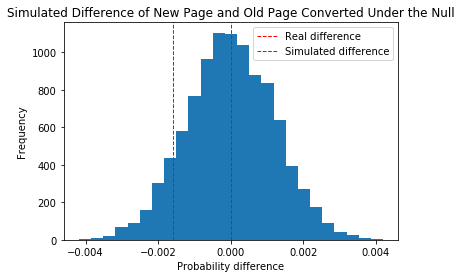

In [30]:
# Plot histogram
plt.hist(p_diffs, bins=25)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Probability difference')
plt.ylabel('Frequency')
actual_diffs = ab_file2[ab_file2['group']=='treatment']['converted'].mean() - ab_file2[ab_file2['group']=='control']['converted'].mean()
plt.axvline(x=(actual_diffs), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

`j`. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [31]:
actual_diffs = ab_file2[ab_file2['group']=='treatment']['converted'].mean() - ab_file2[ab_file2['group']=='control']['converted'].mean()
(p_diffs > actual_diffs).mean()

0.90210000000000001

`k`. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

This is p_value. When you perform a hypothesis test in statistics, a p-value helps you determine the significance of your results. 

` The p-value is a number between 0 and 1 and interpreted in the following way:`

` - A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.`

` - A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.`

` - p-values very close to the cutoff (0.05) are considered to be marginal (could go either way).`

Given that our pvalue is so large, this suggests that observing the data from the null is not unlikely. We therefore would fail to reject the null in favor of the alternative. 

`L`. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = len(ab_file2[(ab_file2['landing_page']=='old_page')&(ab_file2['converted']==1)])
convert_new = len(ab_file2[(ab_file2['landing_page']=='new_page')&(ab_file2['converted']==1)])
n_old = n_old
n_new = n_new

print("convert_old:", convert_old, 
      "\nconvert_new:", convert_new,
      "\nn_old:", n_old,
      "\nn_new:", n_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old: 17489 
convert_new: 17264 
n_old: 145274 
n_new: 145310


`m`. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score,p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new],alternative='smaller')
print("z-score = ", z_score,"\n",
      "p_value = ", p_value)
      

z-score =  1.31092419842 
 p_value =  0.905058312759


`n`. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [34]:
from scipy.stats import norm

print(norm.cdf(z_score))
# Tells us how significant our z-score is

# for our single-sides test, assumed at 95% confidence level, we calculate: 
print(norm.ppf(1-(0.05)))
# Tells us what our critical value at 95% confidence is 
# Here, we take the 95% values as specified in PartII.1

0.905058312759
1.64485362695


 - We find that the z-score of 1.31092419842 is less than the critical value of 1.64485362695. So, we accept the null hypothesis.
 - High p_value (greater probability) tells us that z_value is very significant and that is infact true.
 - As regarding the conversion rates of the old and new pages, we find that old pages are only minutely better than new pages.
 - These values agree with the findings in parts j. and k.


<a id='regression'></a>
### Part III - A regression approach

#### `1.` In this final part, we will see that the result we acheived in the previous A/B test can also be acheived by performing regression.<br><br>

`a`. Since each row is either a conversion or no conversion, what type of regression should we perform in this case?

This is `logistic regression model`, which is different from multiple linear regression because the result is binary 0 or 1.

`b`. The goal is to use **statsmodels** to fit the regression model we specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
ab_file2['intercept'] = 1 #creating an intercept column with all values 1
ab_file2[['ab_page']] = pd.get_dummies(ab_file2['group'])[['treatment']] # a dummy variable column

`c`. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
import statsmodels.api as sm
logit   = sm.Logit(ab_file2['converted'], ab_file2[['intercept','ab_page']]) # creating logistics for our query
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


`d`. Provide the summary of your model below

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:               8.077e-06
Time:                        06:35:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

`e`. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  

The p_value for ab_page is 0.190 > 0.05
Our hypothesis here is:
 - $H_{0}$ : $p_{new}$ - $p_{old}$ = 0
 - $H_{1}$ : $p_{new}$ - $p_{old}$ != 0
 
Thus the difference between $p_{new}$ , $p_{old}$  being statistically insignificant we fail to reject the null.
 
Since, our hypothesis is different from what we had mentioned earlier, we are observing this difference in p_value. In this hypothesis, we see the null involves only one case i.e. $H_0:p_{new}$ - $p_{old}$ = 0   out of complete range of the hypothesis that was assumed earlier i.e $H_0:  p_{new} - p_{old} \leq 0$. 
Thus we can understand if p_value comes out to be 0.9 earlier, it would naturally come out be lesser for present hypothesis which contains only a part of the initial one.

Also in regression we are doing the two sided test in comparison to one sided test which we did earlier..

`f`. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

`Answer:`

- We see that only one feature was chosen to determine whether a user would convert (beside the intercept) so a couple of added features would be a good idea. I would imagine some features like the time spent looking at page and the date the page was designed might be some interesting features to add. 
The longer a customer spends on a page, the more they are likely to be content with it and unwilling to change, it could also be the case that old pages will not work well and people will want an updated version.

- Thus we should consider other factors into the regression model as they might influence the conversions too. 


- The disadvantages to adding additional terms into the regression model is that even with additional factors we can never account for all influencing factors or accomodate them. 

- Also adding too many features into our analysis results in being quite disadvantageous. When we do regression or categorization analysis we want to have features which have large impacts on outcome, small impacts are usually not influencial and should be left for the intercept.

`g`. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [38]:
countries_df = pd.read_csv('countries.csv')
countries_df.head() # we firstly see that we need to match the user_id 
                    #given in countries dataset with the ab_data dataset.  

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
ab_new = countries_df.set_index('user_id').join(ab_file2.set_index('user_id'),how='inner')
ab_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
ab_new['country'].value_counts()
#checking which different countries available

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [41]:
ab_new[['CA','US','UK']] = pd.get_dummies(ab_new['country'])[['CA','US','UK']] #making dummy values for CA and US
ab_new

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,UK
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,0,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,1,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,1,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,1,0


`h`. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [42]:
mod=sm.Logit(ab_new['converted'],ab_new[['intercept','CA','US']]) # checking if converted depends on these columns - intercept, CA, US
result = mod.fit() #fitting the new model
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:               1.521e-05
Time:                        06:35:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

`Result:`

Here we see, the null is that the effect of country (CA or US) on user being converted is 0.

$H_{0}$ : $p_{country}$ - $p_{overall}$ = 0

and alternate hypothesis is:

$H_{A}$ : $p_{country}$ - $p_{overall}$ != 0


Observing the p_value for both US and UK, we find that p_value > 0.05 thus we fail to reject the null.
Thus we can say statistically country has no effect on user being converted.

`Note:` In addition to what we observed above we can also compute similar relation country wise for users who received treatment using ab_page. 

In [45]:
ab_new['US_ab_page'] = ab_new['US']*ab_new['ab_page']
ab_new['CA_ab_page'] = ab_new['CA']*ab_new['ab_page']
# we find the above two columns tell us whether a user from a particular country
#received treatment or not 
ab_new

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,UK,US_ab_page,CA_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0,0
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1,0,0,1,0,0
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1,0,1,0,1,0
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1,0,1,0,1,0
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1,0,1,0,1,0


Now, by computing p_values for these new columns we can find if a user from a particular country received treatment, did he actually convert?

In [46]:
mod1=sm.Logit(ab_new['converted'],ab_new[['intercept','CA_ab_page','US_ab_page']]) # checking if converted depends on these columns - intercept, CA, US
result1 = mod1.fit() #fitting the new model
result1.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sat, 28 Apr 2018   Pseudo R-squ.:               3.272e-05
Time:                        06:40:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.03077
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9873      0.007   -275.573      0.000      -2.001      -1.973
CA_ab_page    -0.0842      0.038     -2.225      0.026      -0.158      -0.010
US_ab_page    -0.0197      0.012     -1.634      0.102      -0.043       0.004
==============================================================================
"""

`Results:`

We find some interesting results. We can see the p_values for both the countries has considerably fallen as from before. For 'CA' p_value < 0.05. Thus if we see country wise, particularly for 'CA', there is difference in probabilty of him being converted. That means, country has some effect on a user(who is receiveing treatment) to be converted. 

It is interesting to note that this is not true for all countries because for 'US' p_value > 0.05. 

### Conclusions :

 - The performance of the old page was found better as computed by different techniques.Hence, we accept the Null Hypothesis and Reject the Alternate Hypothesis.
 - These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data.
 
 - Although it would seem from the outset that there is a difference between the conversion rates of new and old pages, there is just not enough evidence to reject the null hypothesis. From the histogram shown in this report, it seems that the new page does worse than the old page.
 - In the logistic regression model, we find that the values do not show a substantial difference in the conversion rates for control group and treatment group.This indicates that there is just not enough evidence to reject the null hypothesis.
 - When we see the results country wise we find country has some effect on user being converted.

### Resources :
 - Stack overflow
 - Udacity Nanodegree Videos and Resources, including Links in this .ipynb
 - https://pandas.pydata.org/pandas-docs/stable/generat/pandas.DataFrame.duplicated.html

 - https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
 - Project Walkthrough Link on Slack
